### Module Imports


In [17]:
from load_clean_data import load_clean_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
# %load load_clean_data.py
%matplotlib inline

 Load and Clean MovieData.csv
 

In [7]:
movie_data = load_clean_data()


In [ ]:
fig = plt.figure(figsize=(10,10))

In [35]:
genre_avg = movie_data.groupby('genre').agg('mean')
genre_avg = genre_avg.reset_index()
genre_avg.columns


Index(['genre', 'year', 'budget', 'time', 'profit'], dtype='object')

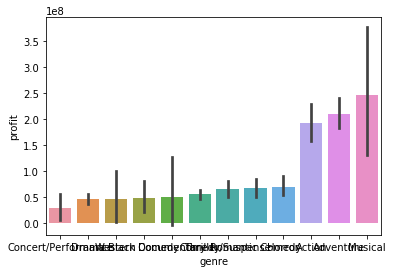

In [38]:
sns.barplot(x='genre', y='profit', data=movie_data,order=genre_avg.sort_values('profit')['genre'])



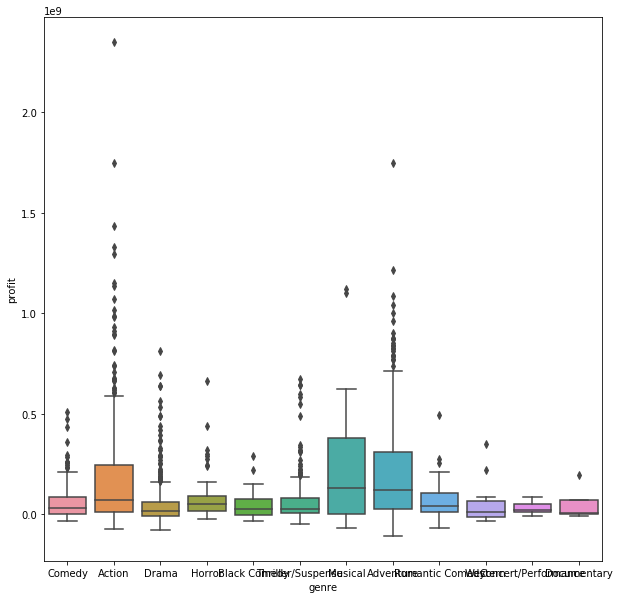

In [22]:
fig = plt.figure(figsize=(10,10))

sns.boxplot(x='genre', y='profit', data=movie_data,)

